## Geopandas Explorations:

In working on creating maps of Barca from their open data source it became apparent that I need to explore the structure of the geopandas data frame a bit more explicitly. This notebook is to capture that exploration outside of the actual GeoBarca notebook where I am trying to generate maps.

This [website](https://docs.astraea.earth/hc/en-us/articles/360043919911-Read-a-GeoJSON-File-into-a-GeoPandas-DataFrame) offers some guidance for reading such files into a geopandas data frame. Let's see if it works.

[Geopandas Reference:](https://geopandas.org/en/stable/index.html)

[kml2geojson](https://pypi.org/project/kml2geojson/): This is a package for converting .kml zip files into geojson data bases. kml files can be downloaded from a google maps webpage. Seems like it could be handy maybe. [conda-forge install](https://anaconda.org/conda-forge/kml2geojson)

[new geojson database](https://github.com/simonepri/geo-maps) Might be interesting to explore this geojson data base which includes bodies of water as well as rivers. So much to do.....

In [67]:
import geopandas as gpd
import pandas as pd
import geoplot as gp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import colorConverter
from IPython.display import display, Image
from shapely.geometry import Point

### Global Geopandas Data Sources

The datasets given below are broadly available for general use. Seems potentially useful for drawing low res maps of the world.

In [2]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

### Barcelona Geojson Data Sets

The bcn-geodata contains a multitude of geographic data sets in geojson format. The 2020 data was imported from [this github](https://github.com/martgnz/bcn-geodata). 

A range of other data is available on the [Barcelona municipal open data site](https://opendata-ajuntament.barcelona.cat/en/) which seems like an AWESOME resource. This is the [mapping article](https://diegoquintanav.github.io/folium-barcelona-EN.html) that got me turned on to the data. Need to explore more for sure.

I had some difficulty understanding what was inside the .geojson file so I opened it to take a look. The screen shot below gives a sense. Notice the 'NOM' field which has the name of the barri which I wanted. On the other hand it doesn't show in the 

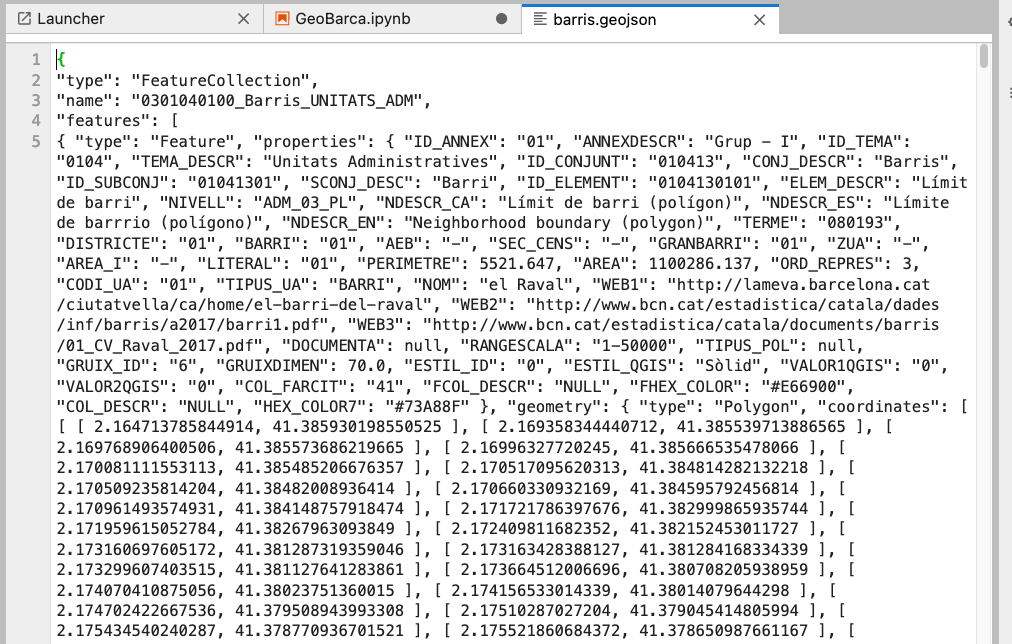

In [3]:
Image('images/barcaGeojsonFormat.png')

### Definitions of GeoDataFrame:

Reading in the Geopandas reference linked at the top I find this definition.

>A GeoDataFrame is a tabular data structure that contains a GeoSeries.
>
>The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this commands will always act on the “geometry” column.

Looking back at the 'methods' it becomes apparent that the GeoSeries column in the data frame is what is plotted. I've seen the centroid method being used but the others have not crossed my path at this point.

**Basic Methods**

    distance(): returns Series with minimum distance from each entry to other

    centroid: returns GeoSeries of centroids

    representative_point(): returns GeoSeries of points that are guaranteed to be within each geometry. It does NOT return centroids.

    to_crs(): change coordinate reference system. See projections

    plot(): plot GeoSeries. See mapping.



### Some data files:

Next two cells read some data in from the database and then print out the .crs (coordinate reference systems) for the dataframe and the type of dataframe to be sure everything is on track.

In [4]:
barcaDFdistrictes = gpd.read_file("bcn-geodata/districtes/districtes.geojson")
barcaDFbarris = gpd.read_file("bcn-geodata/barris/barris.geojson")
barcaDFcensal = gpd.read_file("bcn-geodata/seccio-censal/seccio-censal.geojson")

In [5]:
print("Districts: \n",(barcaDFdistrictes.crs,type(barcaDFdistrictes)))
print("\n Barri: \n", (barcaDFbarris.crs,type(barcaDFbarris)))
print("\n censal: \n", (barcaDFcensal.crs, type(barcaDFcensal)))


Districts: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, <class 'geopandas.geodataframe.GeoDataFrame'>)

 Barri: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich
, <class 'geopandas.geodataframe.GeoDataFrame'>)

 censal: 
 (<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: W

### Display the Dataframe Columns

This is a quick way to see what columns are embedded in the data base.

In [6]:
barcaDFdistrictes.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')

### Colors and Edges

As I work towards pulling the names out of the file and overlaying them on the plot I am using [this tutorial](https://jcutrer.com/python/learn-geopandas-plotting-usmaps) for guidance.

<AxesSubplot:>

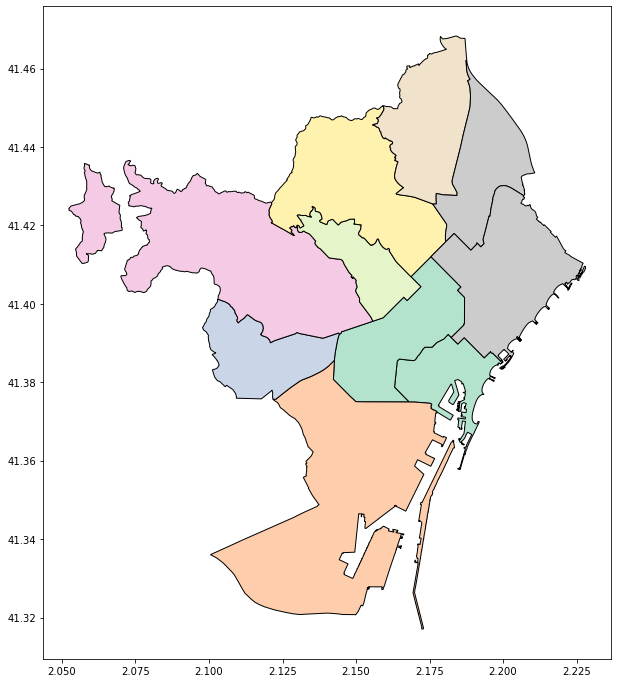

In [7]:
barcaDFdistrictes.plot(cmap='Pastel2',edgecolor='k', figsize=(12, 12))

In [8]:
names = barcaDFdistrictes['NOM']
names

0           Ciutat Vella
1               Eixample
2         Sants-Montjuïc
3              Les Corts
4    Sarrià-Sant Gervasi
5                 Gràcia
6         Horta-Guinardó
7             Nou Barris
8            Sant Andreu
9             Sant Martí
Name: NOM, dtype: object

In [9]:
barcaDFdistrictes.shape[0]

10

In [10]:
barcaDFdistrictes.centroid.x

/Users/bruceemerson/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


0    2.180728
1    2.164470
2    2.144444
3    2.118236
4    2.106513
5    2.152224
6    2.150571
7    2.175075
8    2.193309
9    2.201037
dtype: float64

In [11]:
barcaDFdistrictes['centLocx'] = barcaDFdistrictes.centroid.x
barcaDFdistrictes['centLocy'] = barcaDFdistrictes.centroid.y
barcaDFdistrictes.centLocx

/Users/bruceemerson/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/Users/bruceemerson/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    2.180728
1    2.164470
2    2.144444
3    2.118236
4    2.106513
5    2.152224
6    2.150571
7    2.175075
8    2.193309
9    2.201037
Name: centLocx, dtype: float64

### Lambda?

I really don't get the lambda thing at the moment. I gues I'm just too slow or old school. Here's a link to a discussion which didn't really help me much yet. 
https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

Relevant to notice that just copy and paste from the earlier US map tutorial does work. Don't like that it feels like magic.

What appears to be happening is that the lambda function replaces a loop since the annotate call can only handle a single point at a time. In the next cell I cycle through the annotate options to generate the same thing. Have to say my simple mind handles the enumerate version more easily.

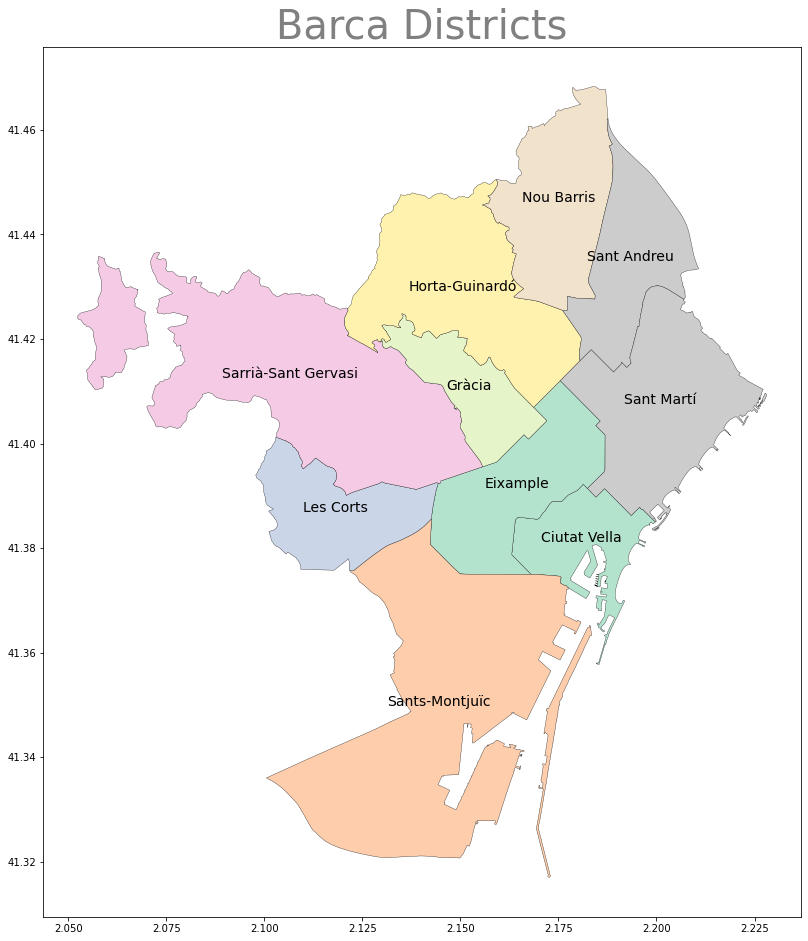

In [12]:
fig, ax = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)

barcaDFdistrictes.apply(lambda x: ax.annotate(text=x.NOM, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1)
barcaDFdistrictes.plot(ax = ax, cmap = 'Pastel2',edgecolor='k', linewidth=0.3) 

plt.title("Barca Districts", fontsize=40, color='grey')
#plt.xlim(2.125, 2.150)
#plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()

In [13]:
for count, name in enumerate(barcaDFdistrictes.NOM):
    print("count: ", count)
    print("value: ", name)


count:  0
value:  Ciutat Vella
count:  1
value:  Eixample
count:  2
value:  Sants-Montjuïc
count:  3
value:  Les Corts
count:  4
value:  Sarrià-Sant Gervasi
count:  5
value:  Gràcia
count:  6
value:  Horta-Guinardó
count:  7
value:  Nou Barris
count:  8
value:  Sant Andreu
count:  9
value:  Sant Martí


In [16]:
barcaDFdistrictes.NOM

0           Ciutat Vella
1               Eixample
2         Sants-Montjuïc
3              Les Corts
4    Sarrià-Sant Gervasi
5                 Gràcia
6         Horta-Guinardó
7             Nou Barris
8            Sant Andreu
9             Sant Martí
Name: NOM, dtype: object

/Users/bruceemerson/opt/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


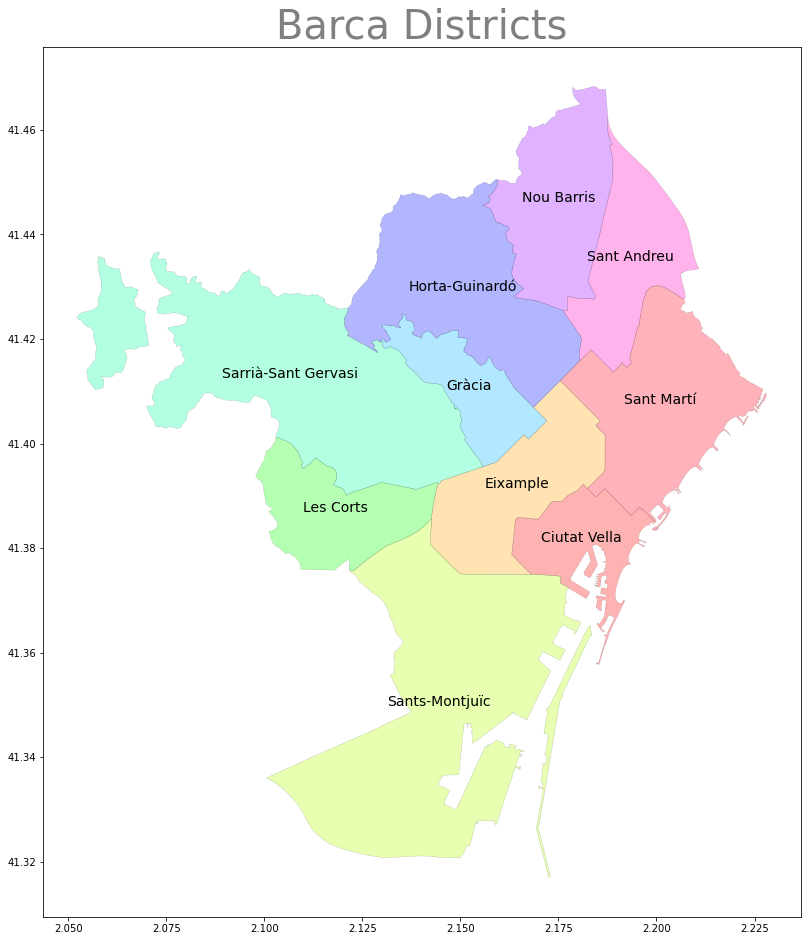

In [14]:
fig1, ax1 = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)

for count, name in enumerate(barcaDFdistrictes.NOM):
    ax1.annotate(text=name,xy = (barcaDFdistrictes.centroid.x[count],barcaDFdistrictes.centroid.y[count]), ha='center', fontsize=14)
    

barcaDFdistrictes.plot(ax = ax1, cmap = 'hsv',edgecolor='k', linewidth=0.3, alpha = .3) 

plt.title("Barca Districts", fontsize=40, color='grey')
#plt.xlim(2.125, 2.150)
#plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()

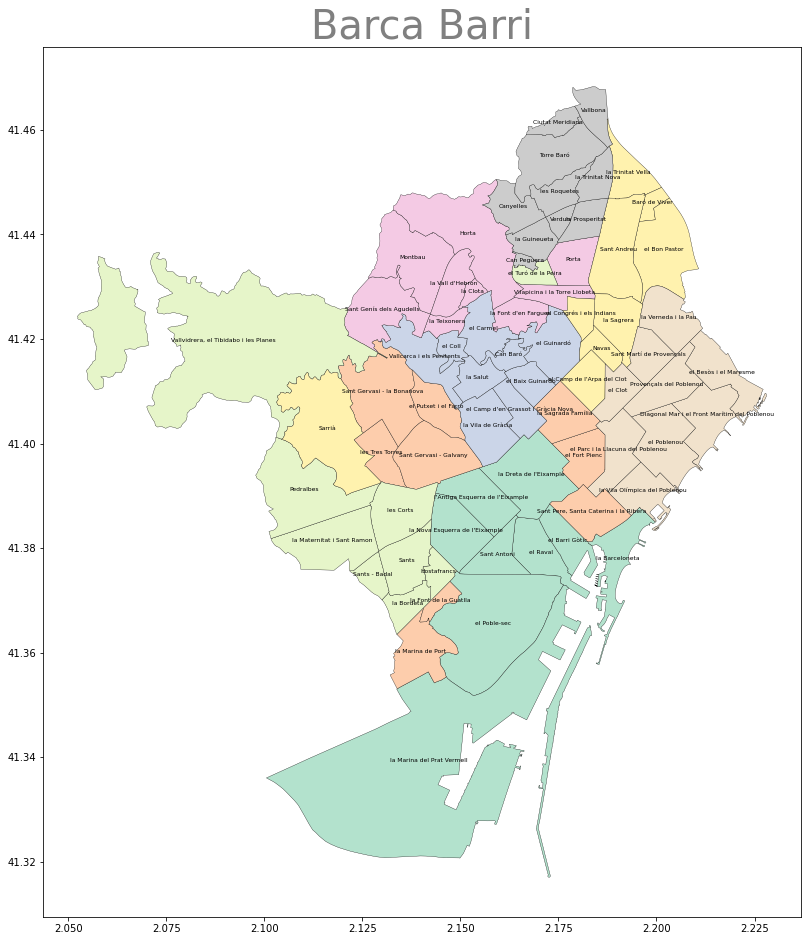

In [15]:
fig2, ax2 = plt.subplots(figsize=(16,16))

fc1 = colorConverter.to_rgba('green', alpha=0.2)

barcaDFbarris.apply(lambda x: ax2.annotate(text=x.NOM, xy=x.geometry.centroid.coords[0], ha='center', fontsize=6),axis=1)
barcaDFbarris.plot(ax=ax2, cmap = 'Pastel2',edgecolor='k', linewidth=0.3) 

plt.title("Barca Barri", fontsize=40, color='grey')
#plt.xlim(2.125, 2.150)
#plt.ylim(41.375, 41.400)
#plt.axis('equal')

plt.show()

### Resetting the dataframe index:

When I was extracting individual countries for the middle world map their row indices came along for the ride which confuses a few things. Resetting the row index seemed like a useful thing. Here is the link to the [stackexchange thread](https://stackoverflow.com/questions/20490274/how-to-reset-index-in-a-pandas-dataframe) that suggested a solution.



### Splitting Geometry (France):

In the world map for France there are a number of discontinuous portions that define France (proper), Sardinia?, and French Guiana?. To separate the distinct parts and then drop the data I didn't want these are the steps. See below for details.

0: Set up and extract france from data frame for earth. 

1: [Explode:](https://stackoverflow.com/questions/58173369/explanding-geopandas-multipolygon-dataframe-to-one-poly-per-line)

2: [Drop:](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

The complex row indices caused me problems originally and then I eventually realized that I could use a more complex index in the .drop command. ```inplace = True``` just replaces the current file with the trimmed file.

>```python
exploded.drop((43,0), inplace = True)
>```  

3: Reset Indices:

Finally I reset the indices so that the row numbers are well behaved. If I reset the indices before I trim the rows it looks like this...
>```python
exploded.reset_index(drop = True, inplace= True)
exploded.drop(0, inplace = True)
>```

....because the first row (French Guiana?) has an index of 0 now.

In [197]:
path_to_earth = gpd.datasets.get_path("naturalearth_lowres")
path_to_cities = gpd.datasets.get_path("naturalearth_cities")

earthDF = gpd.read_file(path_to_earth)
citiesDF = gpd.read_file(path_to_cities)

earthCitiesDF = gpd.sjoin(citiesDF, earthDF)

# remove antarctica and reproject to Mercator
earthDF = earthDF[(earthDF.name != "Antarctica") & (earthDF.name != "Fr. S. Antarctic Lands")]
earthDF = earthDF.to_crs("EPSG:3395")
citiesDF = citiesDF.to_crs("EPSG:3395")
earthCitiesDF = earthCitiesDF.to_crs("EPSG:3395")

# extract france from data frame
france = earthDF[earthDF.name == 'France']

france

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
43,67106161,Europe,France,-99,2699000.0,"MULTIPOLYGON (((-5750519.703 459981.367, -5816..."


In [80]:
exploded = france.explode()
exploded

pop_est continent    name iso_a3  gdp_md_est  \
43 0  67106161    Europe  France    -99   2699000.0   
   1  67106161    Europe  France    -99   2699000.0   
   2  67106161    Europe  France    -99   2699000.0   

                   centroid_col  \
43 0  POINT (-2.87670 42.46070)   
   1  POINT (-2.87670 42.46070)   
   2  POINT (-2.87670 42.46070)   

                                               geometry  
43 0  POLYGON ((-51.65780 4.15623, -52.24934 3.24109...  
   1  POLYGON ((6.18632 49.46380, 6.65823 49.20196, ...  
   2  POLYGON ((8.74601 42.62812, 9.39000 43.00998, ...

#### Notice: Indices

Notice that the index is now a composite of the original index for France and the exploded individual polygons.

In [81]:
exploded.index

MultiIndex([(43, 0),
            (43, 1),
            (43, 2)],
           )

In [82]:
exploded.drop((43,0), inplace = True)
exploded

pop_est continent    name iso_a3  gdp_md_est  \
43 1  67106161    Europe  France    -99   2699000.0   
   2  67106161    Europe  France    -99   2699000.0   

                   centroid_col  \
43 1  POINT (-2.87670 42.46070)   
   2  POINT (-2.87670 42.46070)   

                                               geometry  
43 1  POLYGON ((6.18632 49.46380, 6.65823 49.20196, ...  
   2  POLYGON ((8.74601 42.62812, 9.39000 43.00998, ...

In [83]:
exploded.reset_index(drop = True, inplace= True)
exploded

,pop_est,continent,name,iso_a3,gdp_md_est,centroid_col,geometry
0,67106161,Europe,France,-99,2699000.0,POINT (-2.87670 42.46070),"POLYGON ((6.18632 49.46380, 6.65823 49.20196, ..."
1,67106161,Europe,France,-99,2699000.0,POINT (-2.87670 42.46070),"POLYGON ((8.74601 42.62812, 9.39000 43.00998, ..."


### Changing Individual Entry in Dataframe:

What makes editing a data point in the geopandas dataframe is that the object I want to edit are shapely objects which means I have to create the correct type of object to substitute. I can access the ```centroid_col.x``` and ```centroid_col.y``` attributes of the shapely point but I can't edit them. Perhaps all attributes are not editable (future question). Point is a method that lives in the shapely.geometry library and takes two inputs and configures them as a shapely point which can be substituted into the data frame. 

In [84]:
print(exploded.at[1, 'centroid_col'])

POINT (-2.876696699270627 42.46070432663372)


In [85]:
exploded.at[1, 'centroid_col'].y

42.46070432663372

In [87]:
exploded.centroid_col.y[0]

42.46070432663372

In [96]:
exploded.at[1, 'centroid_col'] = Point(exploded.centroid_col.x[1], exploded.centroid_col.y[1]-2)
print(exploded.at[1, 'centroid_col'])

POINT (-2.876696699270627 42.46070432663372)


### Joining Data Frames:

In some cases joining data frames that are related to each other could be helpful. In the case of the low res earth and the cities joining them with sjoin now connects the cities with the relevant countries. I might have to play with this a bit to be sure I'm plotting the right stuff but it seems worth trying. [Here's the documentation:](https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html)

In [175]:
libya = earthDF[earthDF.name == 'Libya']
egypt = earthDF[earthDF.name == 'Egypt']
algeria = earthDF[earthDF.name == 'Algeria']
tunisia = earthDF[earthDF.name == 'Tunisia']
morocco = earthDF[earthDF.name == 'Morocco']

northAfrica = libya.append(algeria).append(egypt).append(tunisia).append(morocco)

northAfrica.reset_index(drop = True, inplace= True)
earthCitiesDF.reset_index(drop = True, inplace= True)

In [182]:
northAfrica

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((2782987.270 2495525.394, 2782987.270..."
1,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-966742.962 3153346.416, -964597.245..."
2,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((4103929.951 2495525.394, 3662411.247..."
3,11403800,Africa,Tunisia,TUN,130800.0,"POLYGON ((1055546.988 3521585.610, 1008065.076..."
4,33986655,Africa,Morocco,MAR,282800.0,"POLYGON ((-241553.688 4162177.843, -199594.267..."


In [177]:
northAfrica

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((2782987.270 2495525.394, 2782987.270..."
1,40969443,Africa,Algeria,DZA,609400.0,"POLYGON ((-966742.962 3153346.416, -964597.245..."
2,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((4103929.951 2495525.394, 3662411.247..."
3,11403800,Africa,Tunisia,TUN,130800.0,"POLYGON ((1055546.988 3521585.610, 1008065.076..."
4,33986655,Africa,Morocco,MAR,282800.0,"POLYGON ((-241553.688 4162177.843, -199594.267..."


### Filtering Joined Data

Needed to generate a fresh data frame each time to avoid appending data endlessly to the namedCities frame. Sheesh! 

In [178]:
list(earthCitiesDF)

['name_left',
 'geometry',
 'index_right',
 'pop_est',
 'continent',
 'name_right',
 'iso_a3',
 'gdp_md_est']

In [181]:
namedCities = gpd.GeoDataFrame()

namedCities = namedCities.append(earthCitiesDF[earthCitiesDF['name_right'] == 'Italy'])

namedCities

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
0,Vatican City,POINT (1386304.649 5117957.424),141,62137802,Europe,Italy,ITA,2221000.0
1,San Marino,POINT (1385011.519 5425900.277),141,62137802,Europe,Italy,ITA,2221000.0
2,Rome,POINT (1389413.359 5117155.672),141,62137802,Europe,Italy,ITA,2221000.0


In [207]:
namedCities = gpd.GeoDataFrame()

for name in enumerate(northAfrica.name):
    print("name: ", name[1])
    namedCities = namedCities.append(earthCitiesDF[earthCitiesDF['name_right'] == name[1]])

namedCities = namedCities.append(earthCitiesDF[earthCitiesDF['name_left'] == 'Tripoli'])
    
# list of cities in named countries.
namedCities.reset_index(drop = True, inplace= True)
namedCities


name:  Libya
name:  Algeria
name:  Egypt
name:  Tunisia
name:  Morocco


,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est
0,Algiers,POINT (339369.342 4380826.234),82,40969443,Africa,Algeria,DZA,609400.0
1,Cairo,POINT (3478513.938 3488829.344),163,97041072,Africa,Egypt,EGY,1105000.0
2,Tunis,POINT (1133196.582 4386053.055),81,11403800,Africa,Tunisia,TUN,130800.0
3,Rabat,POINT (-761025.475 4008292.104),162,33986655,Africa,Morocco,MAR,282800.0


In [204]:
earthCitiesDF[earthCitiesDF['name_left'] == 'Tripoli']

,name_left,geometry,index_right,pop_est,continent,name_right,iso_a3,gdp_md_est


In [206]:
citiesDF[citiesDF['name'] == 'Tripoli']

,name,geometry
153,Tripoli,POINT (1467192.198 3857840.947)


In [194]:
earthDF[earthDF['continent'] == 'Africa']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((3774143.866 -105050.440, 3792946.708..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-964649.018 3185897.152, -964597.245..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((3266113.592 -498101.603, 3286149.877..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((4629235.496 -186151.287, 4563319.886..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((4363971.168 -517713.351, 4204192.077..."
14,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((2734827.009 913123.149, 2650051.029 ..."
15,12075985,Africa,Chad,TCD,30590.0,"POLYGON ((2653596.173 2209084.627, 2659076.431..."
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((1819514.499 -3301445.373, 1872841.04..."
26,1958042,Africa,Lesotho,LSO,6019.0,"POLYGON ((3225845.433 -3349313.575, 3264462.59..."
48,13805084,Africa,Zimbabwe,ZWE,28330.0,"POLYGON ((3472211.782 -2525575.251, 3413040.59..."


#### Adding Cities:

The basic database has only capitals and a few added cities. For projects we are likely to want to add some cities. This is the format for adding a city after looking up it's long/lat location. Be cautious -- I initially swapped lat and long and got some frustrating results. Also need to impose the original 'WGS 84' reference system on the data frame or the next conversion is unhappy. Remember that this code is long/lat and so has to be included before the conversion to Mercator projection that I am using.  Actual coding copied but not executed here.

```python
# add cities in lat/long format before conversion
meccaLoc = Point(39.826168, 21.422510)
medinaLoc = Point(39.612236, 24.470901)
cordobaLoc = Point(-4.779651, 37.888075)
barcaLoc = Point(2.173695, 41.385155)
stCompostelaLoc = Point(-8.544844, 42.878212)
zaragozaLoc = Point(-0.887712, 41.649693)
citiesDF.loc[len(citiesDF.index)] = ['Mecca', meccaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Medina', medinaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Cordoba', cordobaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Barcelona', barcaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Santiago de Compostela', stCompostelaLoc]
citiesDF.loc[len(citiesDF.index)] = ['Zaragoza', zaragozaLoc]

citiesDF.crs = 'WGS 84'
```